<a href="https://colab.research.google.com/github/dsrojo10/Learning_AI/blob/main/ejemplo2/red_neuronal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de imagenes con AI

En este caso tenemos una **red produnda** ya que contamos con mas de una capa oculta

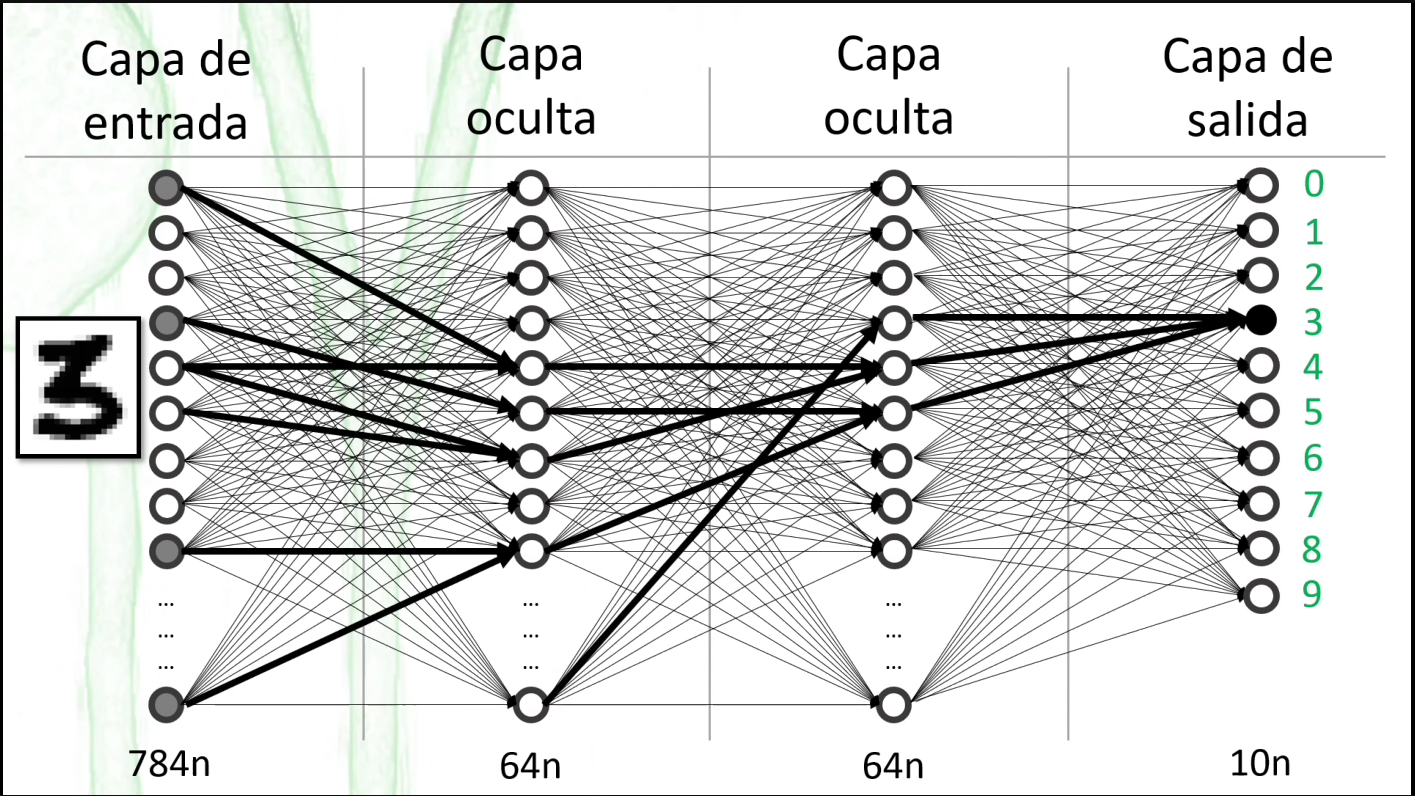

In [1]:
# librerias a emplear
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()

logger.setLevel(logging.ERROR)

In [2]:
# modelo de entrenamiento (train_dataset = 60k datos de entrenamiento & test_dataset = 10k datos de prueba )
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# posibles respuestas
class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

# cantidad de ejemplos
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [3]:
# normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

* Capa 1 [de entrada][**Flatten**]: 784 neuronas de la forma: (28,28,1)
* Capa 2 [oculta #1][**Dense**]: 64 neuronas
* Capa 3 [oculta #2][**Dense**]: 64 neuronas
* Capa 4 [de salida][**Dense**]: 10 neuronas

In [4]:
# estructura de la red

#red 1 -> 2 capas ocultas de 64 neuronas
# model = tf.keras.Sequential([
# 	tf.keras.layers.Flatten(input_shape=(28,28,1)),
# 	tf.keras.layers.Dense(64, activation=tf.nn.relu),
# 	tf.keras.layers.Dense(64, activation=tf.nn.relu),
# 	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
# ])

#red 2 -> 2 capas ocultas de 3 neuronas
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(3, activation=tf.nn.relu),
	tf.keras.layers.Dense(3, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])


In [5]:
# indicar las funciones a utilizar
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

Entrenar modelo

In [6]:
# aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

#Realizar el aprendizaje
model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) #No sera necesario pronto
)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 1.6449 - accuracy: 0.3756
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2543 - accuracy: 0.5728
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1243 - accuracy: 0.6303
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0398 - accuracy: 0.6879
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9585 - accuracy: 0.7520


In [7]:
# evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9331 - accuracy: 0.7578
Resultado en las pruebas:  0.7577999830245972


1/1 [==============================] - 0s 71ms/step


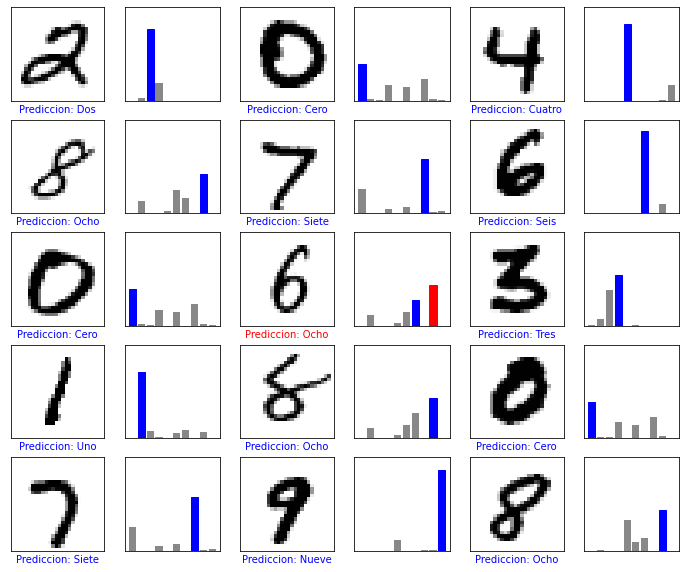

In [8]:
# ver resultados de forma grafica

for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()